In [1]:
pip install tensorflow

Think of Keras as a helpful software library that makes it much easier to create and work with AI models, especially deep learning ones like image recognition or language processing. It’s built on top of other powerful tools like TensorFlow, which handle the heavy math and computations. Keras simplifies the process, allowing you to focus more on designing the model and less on technical details.

Understanding Keras Concepts :

1) Models

Keras gives you two main ways to build your AI models:
a)Sequential: This is like stacking blocks in a straight line. It's perfect for beginners because you just add one piece after another in order.
b)Functional API: This method is for when you want to get fancy. You can make models that do more complex stuff, like taking in several types of information at once or giving more than one output.
Starting with Sequential models is a good idea because it's simpler. Once you get the hang of it, you can try the more complex Functional API.

2) Layers

Think of layers as the ingredients in your AI recipe. Here are some you'll use a lot:
Dense: This is the basic building block, like flour in a cake. It connects everything together in a simple way.
Conv2D: Imagine this as a special tool for analyzing images, helping your model see patterns.
LSTM: This one is great for when your data is like a story, with a beginning, middle, and end. It helps predict what comes next.
Embedding: This turns categories or words into numbers that your model can understand and work with.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.optimizers import SGD

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

Pixel Range: In images, pixel values typically range from 0 to 255, where 0 is black and 255 is white (for grayscale images, or each RGB channel in color images).

Normalization: By dividing by 255, you scale these values to a range between 0 and 1. This is called normalization, and it helps the neural network process the data more efficiently.

In [8]:
#divide each pixel by 255 to bring it in range of 0-1
x_train=x_train/255.0
x_test=x_test/255.0

Flattening the Image: Each 28x28 image has 784 pixels (since 28×28=784).
By reshaping it to (-1, 28*28), you turn each image into a single 784-dimensional vector (a row of 784 values) instead of a 2D matrix.

In [27]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [10]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [11]:
x_train.shape

(60000, 784)

SGD (Stochastic Gradient Descent): 

Optimizer: SGD stands for Stochastic Gradient Descent, which is a popular optimization algorithm used to minimize the loss in a neural network.
Learning Process: Gradient descent adjusts the model’s parameters to reduce the error (or loss) in predictions. In the process, it computes gradients of the loss function with respect to model parameters and uses those gradients to update the parameters step-by-step.
Stochastic: Stochastic here means that instead of computing the gradients based on the entire dataset, it does so using random batches of data (one sample at a time or small mini-batches), which speeds up the process.
Learning Rate: In this example, the learning_rate of 0.01 is set, which controls the size of each step toward the minimum loss. Smaller values make the learning slower and more precise, while larger values speed it up but can overshoot the optimal solution.

In [12]:
# Preparing the model

model=models.Sequential()

#Flattened Input First Layer
model.add(layers.Dense(128,activation='relu',input_shape=(784,)))

#Hidden Layer
model.add(layers.Dense(64,activation='relu'))

#Output Layer : 10 Neurons for each digit class 0-9
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

C:\Users\Neha\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6656 - loss: 1.1776 - val_accuracy: 0.9023 - val_loss: 0.3434
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9042 - loss: 0.3403 - val_accuracy: 0.9221 - val_loss: 0.2757
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9214 - loss: 0.2792 - val_accuracy: 0.9325 - val_loss: 0.2402
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9291 - loss: 0.2412 - val_accuracy: 0.9352 - val_loss: 0.2224
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9408 - loss: 0.2123 - val_accuracy: 0.9441 - val_loss: 0.1965
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9459 - loss: 0.1902 - val_accuracy: 0.9477 - val_loss: 0.1832
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9494 - loss: 0.1763 - val_accuracy: 0.9538 - val_loss: 0.1693
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9527 - loss: 0.1635 - 

In [13]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9637 - loss: 0.1113


In [14]:
print(test_loss)
print(test_accuracy)

0.09803184866905212
0.9690999984741211


In [15]:
import matplotlib.pyplot as plt

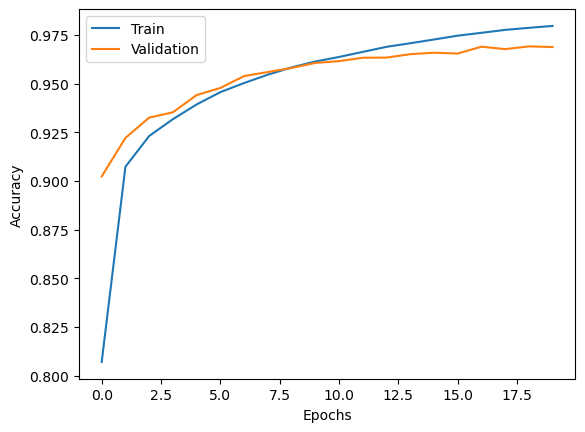

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

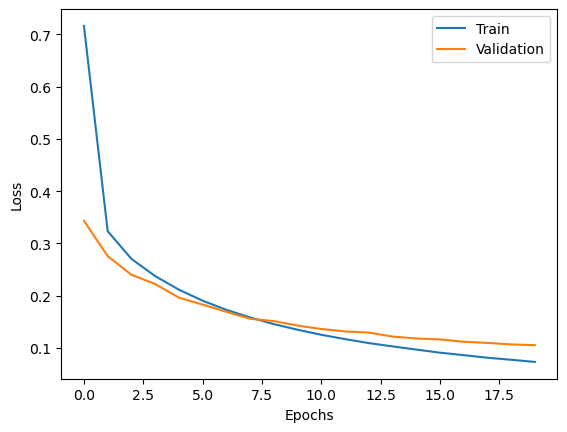

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

In [28]:
predicted_value=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[1.4515529e-06 1.7054234e-10 6.4908631e-06 1.1171311e-09 5.5856503e-07
 1.9122954e-09 9.9999154e-01 1.1307626e-10 4.4770626e-08 1.1940511e-08]


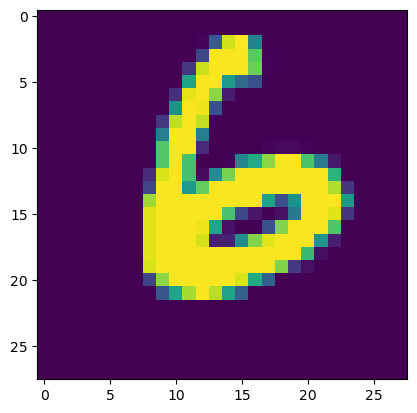

In [33]:
import random

x_test=x_test.reshape(-1,28,28)      #coz now we have to load image so we need grid of pixels
n=random.randint(0,len(x_test)-1)

plt.imshow(x_test[n])
print(predicted_value[n])